<a href="https://colab.research.google.com/github/KPsimo/Kidus_Football_Games/blob/main/DSRP_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import warnings #Just imported everything from Linear regression, KNN, matplotlib, scaling, and evaluation metrics. Copied from previous labs.
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style='darkgrid')

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

In [108]:
from google.colab import drive

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GAMES . CSV/games.csv')

right_df = pd.read_csv('https://raw.githubusercontent.com/ThompsonJamesBliss/WeatherData/refs/heads/master/data/games_weather.csv')

l1 = ['game_id', 'nfl_detail_id', 'ftn']
right_df.head()

,game_id,Source,DistanceToStation,TimeMeasure,Temperature,DewPoint,Humidity,Precipitation,WindSpeed,WindDirection,Pressure,EstimatedCondition
0,2000090300,Meteostat,3.79,9/3/2000 12:00,80.96,73.04,77.0,0.000,3.36,200.0,29.8902,Clear
1,2000090300,Meteostat,3.79,9/3/2000 13:00,80.96,73.04,77.0,0.000,5.84,300.0,29.8784,Clear
2,2000090300,Meteostat,3.79,9/3/2000 14:00,82.94,73.04,72.0,0.000,5.84,260.0,29.8696,Clear
3,2000090300,Meteostat,3.79,9/3/2000 15:00,80.06,74.12,82.0,0.000,3.36,180.0,29.8578,Clear
4,2000090300,Meteostat,3.79,9/3/2000 16:00,75.02,75.02,100.0,0.728,4.72,280.0,29.8519,Heavy Rain


In [109]:
df.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,ftn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,1999091210,598.0,NaN,199909120atl,NaN,190912001.0,NaN,7,7,NaN,NaN,-4.0,NaN,NaN,49.0,NaN,NaN,0,dome,astroturf,NaN,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,1999091206,597.0,NaN,199909120chi,NaN,190912003.0,NaN,7,7,NaN,NaN,-3.0,NaN,NaN,38.0,NaN,NaN,0,outdoors,grass,80.0,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,1999091213,604.0,NaN,199909120cle,NaN,190912005.0,NaN,7,7,NaN,NaN,-6.0,NaN,NaN,37.0,NaN,NaN,1,outdoors,grass,78.0,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,1999091208,602.0,NaN,199909120gnb,NaN,190912009.0,NaN,7,7,NaN,NaN,9.0,NaN,NaN,43.0,NaN,NaN,0,outdoors,grass,67.0,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,1999091202,591.0,NaN,199909120clt,NaN,190912011.0,NaN,7,7,NaN,NaN,-3.0,NaN,NaN,45.5,NaN,NaN,1,dome,astroturf,NaN,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome


In [110]:
# new_df = pd.merge(df, right_df, how='inner')

In [111]:
df.columns = df.columns.str.title() #Makes first letter uppercase || Had to do df.columns again for it to get updated. Not capital because only first word
df.columns = df.columns.str.replace('_', ' ') #Replaces underscore(_) with space( )
df['Surface'] = df['Surface'].str.strip() #Removes any extra characters such as spaces, used this for grass.

In [112]:
df['Temp'].median()

59.0

In [113]:
df[df['Wind']>55]
df = df.drop(index =[2396]) # Outlier wind speed (71 mph).
df= df.drop(index =[4703])# Outlier wind speed (70 mph)

In [114]:
df[df['Result']<-20]
df.columns

Index(['Game Id', 'Season', 'Game Type', 'Week', 'Gameday', 'Weekday',
       'Gametime', 'Away Team', 'Away Score', 'Home Team', 'Home Score',
       'Location', 'Result', 'Total', 'Overtime', 'Old Game Id', 'Gsis',
       'Nfl Detail Id', 'Pfr', 'Pff', 'Espn', 'Ftn', 'Away Rest', 'Home Rest',
       'Away Moneyline', 'Home Moneyline', 'Spread Line', 'Away Spread Odds',
       'Home Spread Odds', 'Total Line', 'Under Odds', 'Over Odds', 'Div Game',
       'Roof', 'Surface', 'Temp', 'Wind', 'Away Qb Id', 'Home Qb Id',
       'Away Qb Name', 'Home Qb Name', 'Away Coach', 'Home Coach', 'Referee',
       'Stadium Id', 'Stadium'],
      dtype='object')

Removing unnessecary columns

In [115]:
dropper = ['Away Qb Name', 'Home Qb Name', 'Away Qb Id', 'Home Qb Id', 'Away Coach',
               'Home Coach', 'Pff', 'Ftn', 'Pff', 'Ftn', 'Nfl Detail Id',
               'Pfr', 'Espn', 'Old Game Id', 'Gsis', 'Stadium Id', 'Stadium',
               'Under Odds', 'Over Odds', 'Div Game', 'Game Id']
fixed_df = df.drop(columns=dropper)
fixed_df.columns

fixed_df['Temp'].median()

fixed_df['Home Score'] = fixed_df['Home Score'].convert_dtypes('int')
fixed_df['Away Score'] = fixed_df['Away Score'].convert_dtypes('int').dropna()

fixed_df['Home Score'] = fixed_df['Home Score'].dropna()
fixed_df['Home Score']

,Home Score
0,14
1,20
2,0
3,28
4,31
...,...
7258,<NA>
7259,<NA>
7260,<NA>
7261,<NA>


In [116]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'].fillna(70) #had to do fixed_df.loc twice to
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'].fillna(70) #Regulated temp so I took the median to balalnce

In [117]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'].fillna(0)
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'].fillna(0)
pd.set_option('display.max_columns', None)  # Shows all the columns. I google this to see all the columns when i do something like .head()

New Column for Wins

In [118]:
fixed_df.head()

,Season,Game Type,Week,Gameday,Weekday,Gametime,Away Team,Away Score,Home Team,Home Score,Location,Result,Total,Overtime,Away Rest,Home Rest,Away Moneyline,Home Moneyline,Spread Line,Away Spread Odds,Home Spread Odds,Total Line,Roof,Surface,Temp,Wind,Referee
0,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17,ATL,14,Home,-3.0,31.0,0.0,7,7,NaN,NaN,-4.0,NaN,NaN,49.0,dome,astroturf,70.0,0.0,Gerry Austin
1,1999,REG,1,1999-09-12,Sunday,NaN,KC,17,CHI,20,Home,3.0,37.0,0.0,7,7,NaN,NaN,-3.0,NaN,NaN,38.0,outdoors,grass,80.0,12.0,Phil Luckett
2,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43,CLE,0,Home,-43.0,43.0,0.0,7,7,NaN,NaN,-6.0,NaN,NaN,37.0,outdoors,grass,78.0,12.0,Bob McElwee
3,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24,GB,28,Home,4.0,52.0,0.0,7,7,NaN,NaN,9.0,NaN,NaN,43.0,outdoors,grass,67.0,10.0,Tony Corrente
4,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14,IND,31,Home,17.0,45.0,0.0,7,7,NaN,NaN,-3.0,NaN,NaN,45.5,dome,astroturf,70.0,0.0,Ron Blum


In [119]:
fixed_df['Home Result'] = ''

fixed_df.loc[fixed_df['Result'] > 0, 'Home Result'] = "Win"
fixed_df.loc[fixed_df['Result'] < 0, 'Home Result'] = "Lose"
fixed_df.loc[fixed_df['Result'] == 0, 'Home Result'] = "Draw"

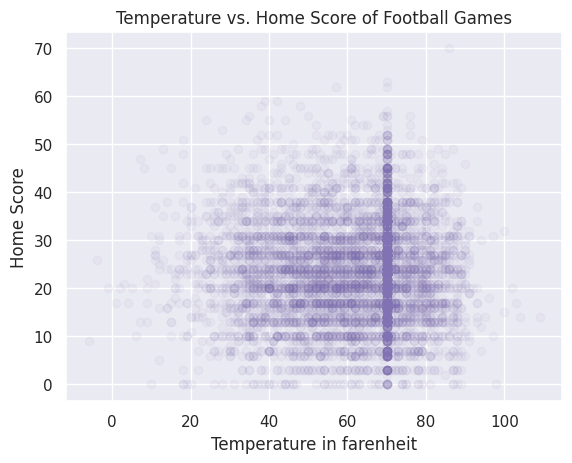

In [120]:
categories = fixed_df['Temp']
bars = fixed_df['Home Score']

plt.scatter(categories, bars, alpha = 0.05, c= 'm')
plt.title("Temperature vs. Home Score of Football Games")
plt.ylabel("Home Score")
plt.xlabel("Temperature in farenheit")
plt.show()


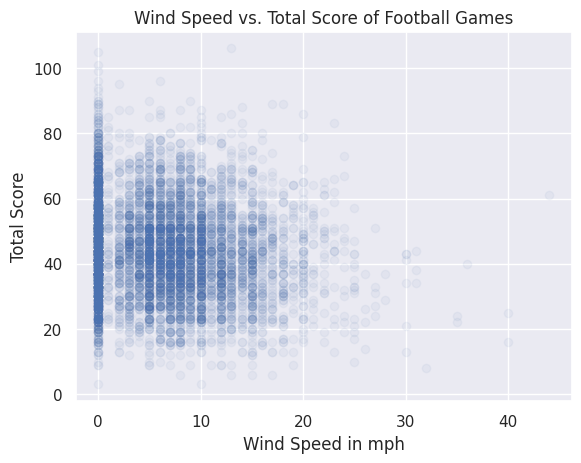

In [121]:
categories = fixed_df['Wind']
bars = fixed_df['Total']

plt.scatter(categories, bars, alpha = 0.05, c= 'b')
plt.title("Wind Speed vs. Total Score of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Wind Speed in mph")
plt.show()


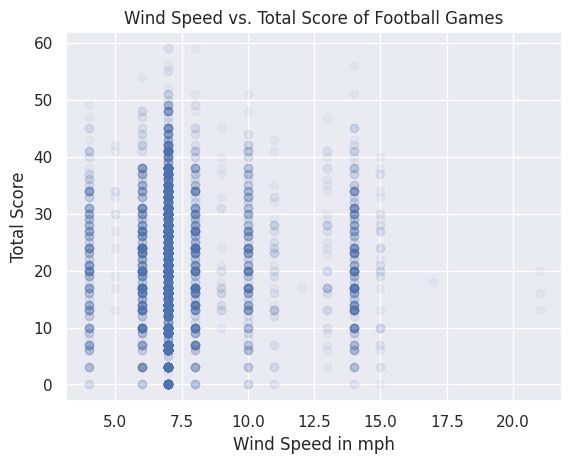

In [122]:
categories = fixed_df['Away Rest']
bars = fixed_df['Away Score']

plt.scatter(categories, bars, alpha = 0.05, c= 'b')
plt.title("Wind Speed vs. Total Score of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Wind Speed in mph")
plt.show()


In [123]:
# categories = fixed_df['Surface']
# bars = fixed_df['Home Score']

# plt.bar(categories, bars, alpha = 0.05)
# plt.title("Wind Speed vs. Total Score of Football Games")
# plt.ylabel("Total Score")
# plt.xlabel("Wind Speed in mph")
# plt.show()



In [124]:
# fixed_df.info()

numeric = fixed_df.select_dtypes(exclude='object')
numeric.corr()

,Season,Week,Away Score,Home Score,Result,Total,Overtime,Away Rest,Home Rest,Away Moneyline,Home Moneyline,Spread Line,Away Spread Odds,Home Spread Odds,Total Line,Temp,Wind
Season,1.000000,0.013685,0.093779,0.057018,-0.024211,0.107920,-0.011436,0.000195,-0.030704,-0.085178,0.058530,-0.053831,-0.227437,-0.210079,0.363508,0.021290,-0.111057
Week,0.013685,1.000000,-0.017812,0.036232,0.037817,0.013741,0.007649,-0.017238,0.055375,0.020808,-0.027325,0.025357,0.034279,-0.004432,-0.000495,-0.506908,0.041958
Away Score,0.093779,-0.017812,1.000000,-0.030271,-0.708689,0.686422,0.090094,0.017282,-0.009779,-0.301247,0.288158,-0.304270,0.060339,-0.071104,0.225989,0.058179,-0.098907
Home Score,0.057018,0.036232,-0.030271,1.000000,0.726650,0.706092,0.035805,-0.018239,0.015722,0.301928,-0.291517,0.302651,-0.047779,0.028762,0.221504,-0.010406,-0.090222
Result,-0.024211,0.037817,-0.708689,0.726650,1.000000,0.026598,-0.036651,-0.024752,0.017819,0.416237,-0.400049,0.422756,-0.074475,0.068466,0.001020,-0.047255,0.004132
Total,0.107920,0.013741,0.686422,0.706092,0.026598,1.000000,0.089876,-0.001027,0.004511,0.007204,-0.008885,0.004631,0.007906,-0.029599,0.321253,0.033612,-0.135811
Overtime,-0.011436,0.007649,0.090094,0.035805,-0.036651,0.089876,1.000000,0.014034,0.003585,-0.012099,0.019220,-0.010164,0.004486,-0.001022,-0.019121,-0.017649,0.002216
Away Rest,0.000195,-0.017238,0.017282,-0.018239,-0.024752,-0.001027,0.014034,1.000000,0.234837,-0.028212,0.026099,-0.024820,-0.009781,0.010132,0.023429,0.000843,0.022536
Home Rest,-0.030704,0.055375,-0.009779,0.015722,0.017819,0.004511,0.003585,0.234837,1.000000,0.044770,-0.042532,0.045261,-0.001815,-0.000135,0.021414,-0.028805,0.026669
Away Moneyline,-0.085178,0.020808,-0.301247,0.301928,0.416237,0.007204,-0.012099,-0.028212,0.044770,1.000000,-0.965462,0.973713,-0.092572,0.115825,-0.010786,-0.063993,0.011528


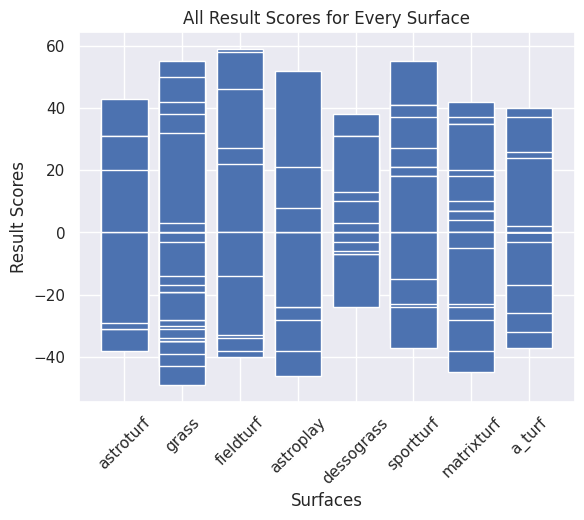

In [125]:
plot_df = fixed_df[['Surface', 'Result']].dropna()
plot_df.isnull().value_counts()
plot_df


plt.bar(plot_df['Surface'], plot_df['Result'])
plt.title("All Result Scores for Every Surface")
plt.ylabel('Result Scores')
plt.xlabel('Surfaces')
plt.xticks(rotation=45)
plt.show()


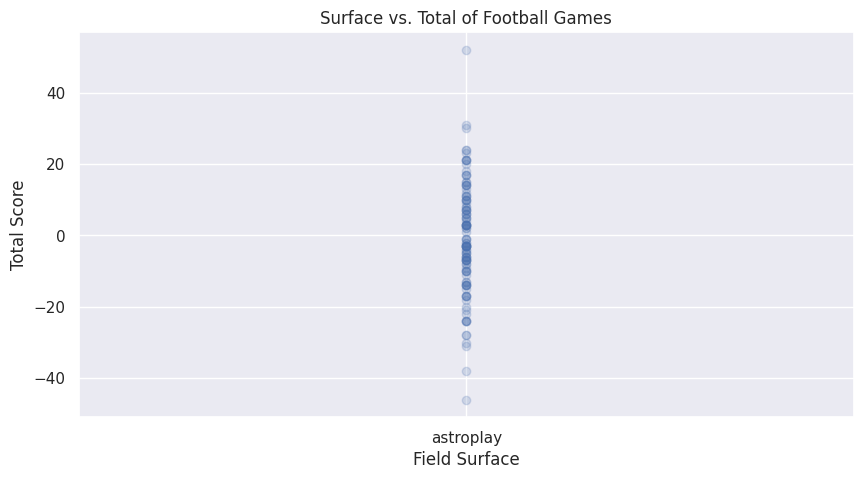

In [126]:
plot_df = fixed_df[fixed_df['Surface'] == 'astroplay'][['Surface', 'Result']].dropna()

categories = plot_df['Surface']
bars = plot_df['Result']

plt.figure(figsize=(10, 5))
plt.scatter(categories, bars, alpha = 0.2)
plt.title("Surface vs. Total of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Field Surface")
plt.show()


In [127]:
fixed_df1 = fixed_df.loc[fixed_df['Result'].notna(), :]

In [128]:
fturf_scores = fixed_df[fixed_df['Surface'] == 'fieldturf']['Total'].dropna()
grass_scores = fixed_df[fixed_df['Surface'] == 'grass']['Total'].dropna()

In [129]:
t_stat, p_val = ttest_ind(fturf_scores, grass_scores)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

T-Stat: 5.001108398515901, P-Value: 5.871476926355395e-07



In [130]:
fixed_df['Surface'].unique()

array(['astroturf', 'grass', 'fieldturf', 'astroplay', 'dessograss',
       'sportturf', 'matrixturf', 'a_turf', nan], dtype=object)

In [131]:
aplay_scores = fixed_df[fixed_df['Surface'] == 'astroplay']['Total'].dropna()
grass_scores = fixed_df[fixed_df['Surface'] == 'grass']['Total'].dropna()

t_stat1, p_val1 = ttest_ind(aplay_scores, grass_scores)
print(f"T-Stat: {t_stat1}, P-Value: {p_val1}\n")

T-Stat: -2.6007281605288797, P-Value: 0.009336054332385775



In [132]:
matrix_scores = fixed_df[fixed_df['Surface'] == 'matrixturf']['Total'].dropna()
grass_scores = fixed_df[fixed_df['Surface'] == 'grass']['Total'].dropna()

t_stat1, p_val1 = ttest_ind(matrix_scores, grass_scores)
print(f"T-Stat: {t_stat1}, P-Value: {p_val1}\n")

fixed_df.columns

T-Stat: 5.13548995601833, P-Value: 2.9424461418601974e-07



Index(['Season', 'Game Type', 'Week', 'Gameday', 'Weekday', 'Gametime',
       'Away Team', 'Away Score', 'Home Team', 'Home Score', 'Location',
       'Result', 'Total', 'Overtime', 'Away Rest', 'Home Rest',
       'Away Moneyline', 'Home Moneyline', 'Spread Line', 'Away Spread Odds',
       'Home Spread Odds', 'Total Line', 'Roof', 'Surface', 'Temp', 'Wind',
       'Referee', 'Home Result'],
      dtype='object')

In [133]:
matrix_scores = fixed_df[fixed_df['Surface'] == 'matrixturf']['Total'].dropna()
grass_scores = fixed_df[fixed_df['Surface'] == 'grass']['Total'].dropna()

t_stat1, p_val1 = ttest_ind(matrix_scores, grass_scores)
print(f"T-Stat: {t_stat1}, P-Value: {p_val1}\n")

T-Stat: 5.13548995601833, P-Value: 2.9424461418601974e-07



A windy field causes a significant change in scoring ability by teams.
H0 = A windy field has no significant chagne in scoring ability.


In [134]:
windy = fixed_df[fixed_df['Wind'] > 7]['Total'].dropna()
normal = fixed_df[fixed_df['Wind'] == 0]['Total'].dropna()

t_stat1, p_val1 = ttest_ind(normal, windy)
print(f"T-Stat: {t_stat1}, P-Value: {p_val1}\n")
print("Statistically significant")

T-Stat: 9.798503235490807, P-Value: 1.8817351464950709e-22

Statistically significant


In [135]:
# Create new dataframe for KNN
ml_df = fixed_df[['Wind', 'Total', 'Temp', 'Surface', 'Home Rest', 'Away Rest', 'Total Line', 'Week', 'Overtime', 'Roof']].dropna()

# Create the new Score column for knn and encode surface
ml_df['Score'] = ''
# Score category based on total
ml_df.loc[ml_df['Total'] > 48, 'Score'] = "High"
ml_df.loc[(ml_df['Total'] >= 39) & (ml_df['Total'] <= 48), 'Score'] = 'Medium'
ml_df.loc[ml_df['Total'] < 39, 'Score'] = "Low"
low = ml_df['Total'].quantile(0.36)
high = ml_df['Total'].quantile(0.63)
#Tested multiple quantiles and this seemed best.


#Cutting data into 3 equal parts
# ml_df['Score'] = pd.qcut(ml_df['Total'], q=3, labels=['Low', 'Medium', 'High'])

ml_df_encoded = pd.get_dummies(ml_df, columns=['Surface', 'Roof'], drop_first=True)

# Step 4: features and labels from the encoded dataFrame
features = ml_df_encoded.drop(columns=['Total', 'Score', 'Total Line'])
labels = ml_df_encoded['Score']

ml_df['Score'].value_counts()
# ml_df.groupby('Score')['Total'].describe()
# print(low)
# print(high)

,count
Score,
Low,2410
High,2404
Medium,1915


In [136]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [137]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2, random_state=42)

In [138]:
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train, y_train)
print(y_train.value_counts())


Score
High      1909
Low       1908
Medium    1566
Name: count, dtype: int64


In [139]:
pred = model.predict(X_test)

metrics.accuracy_score(y_test, pred)

0.3826151560178306

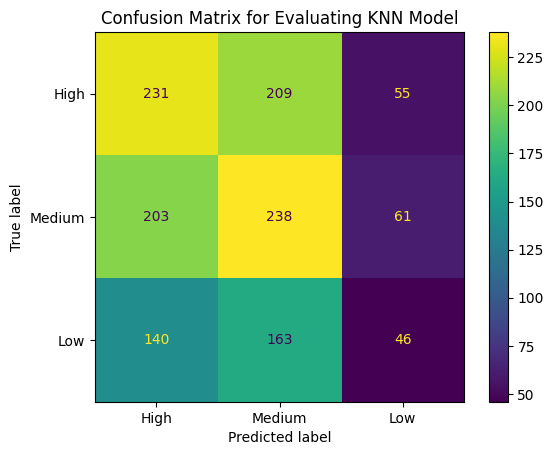

In [144]:
plt.style.use('default')

metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels = ['High', 'Medium', 'Low'])

plt.title('Confusion Matrix for Evaluating KNN Model')

plt.show()

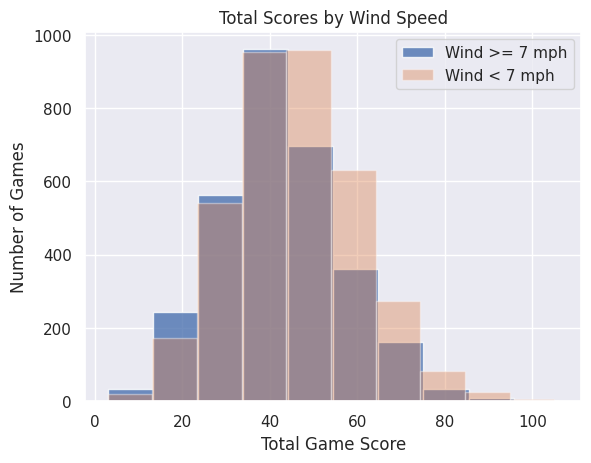

In [141]:
# histogram (copied from lab 6 and altered)
sns.set_theme(style='darkgrid')

plt.hist(ml_df[ml_df['Wind'] >= 7]['Total'].dropna(), bins=10, alpha=0.8, label='Wind >= 7 mph')
plt.hist(ml_df[ml_df['Wind'] < 7]['Total'].dropna(), bins=10, alpha=0.4, label='Wind < 7 mph')

# label, legend
plt.legend()
plt.title("Total Scores by Wind Speed")
plt.xlabel('Total Game Score')
plt.ylabel('Number of Games')
plt.show()


In [142]:
fixed_df.columns
blank = fixed_df.drop(columns=[
    'Away Team', 'Away Score', 'Home Team', 'Home Score',
    'Location', 'Result', 'Overtime', 'Away Rest', 'Home Rest',
    'Away Moneyline', 'Home Moneyline', 'Spread Line',
    'Away Spread Odds', 'Home Spread Odds', 'Total Line',
    'Surface', 'Referee', 'Home Result'
])
blank[blank['Total'] <20].sample(5)

,Season,Game Type,Week,Gameday,Weekday,Gametime,Total,Roof,Temp,Wind
5315,2018,SB,21,2019-02-03,Sunday,18:30,16.0,closed,70.0,0.0
1872,2006,REG,2,2006-09-17,Sunday,16:15,15.0,outdoors,61.0,7.0
2620,2008,REG,17,2008-12-28,Sunday,13:00,13.0,outdoors,39.0,30.0
169,1999,REG,12,1999-11-28,Sunday,NaN,19.0,dome,70.0,0.0
456,2000,REG,14,2000-12-03,Sunday,13:00,16.0,outdoors,30.0,14.0


In [143]:
features

,Wind,Temp,Home Rest,Away Rest,Week,Overtime,Surface_astroplay,Surface_astroturf,Surface_dessograss,Surface_fieldturf,Surface_grass,Surface_matrixturf,Surface_sportturf,Roof_dome,Roof_outdoors
0,0.0,70.0,7,7,1,0.0,False,True,False,False,False,False,False,True,False
1,12.0,80.0,7,7,1,0.0,False,False,False,False,True,False,False,False,True
2,12.0,78.0,7,7,1,0.0,False,False,False,False,True,False,False,False,True
3,10.0,67.0,7,7,1,0.0,False,False,False,False,True,False,False,False,True
4,0.0,70.0,7,7,1,0.0,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,8.0,34.0,7,6,20,0.0,False,False,False,False,True,False,False,False,True
6987,4.0,19.0,7,8,20,0.0,False,False,False,False,False,False,False,False,True
6988,11.0,40.0,7,8,21,0.0,False,False,False,False,True,False,False,False,True
6989,8.0,31.0,8,7,21,0.0,False,False,False,False,True,False,False,False,True
